<a href="https://colab.research.google.com/github/rpandya5/gaitanalysis/blob/main/data%20processing/Data_Visualization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google drive to access the datasets
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Data for Fall F01 by Subject SA01 in Trial R01 after extraction from text files and before Window Sampling

df_before = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/FALL/F01_SA01_R01.csv')
df_before

Timestamp   X_Acc_1    Y_Acc_1   Z_Acc_1    X_Gyro     Y_Gyro    Z_Gyro  \
0         0.000 -0.344883  -9.848320 -0.958008  5.126953  15.075684  1.647949   
1         0.005 -0.114961 -10.078242 -0.881367  6.042480  15.747070  2.136230   
2         0.010 -0.038320 -10.346484 -0.843047  6.958008  16.601562  2.746582   
3         0.015  0.038320 -10.614727 -0.919687  7.751465  17.456055  3.479004   
4         0.020  0.076641 -10.768008 -0.958008  8.178711  18.493652  4.272461   
...         ...       ...        ...       ...       ...        ...       ...   
2995     14.975 -4.521797   2.567461 -9.618398 -2.868652   0.976562  0.000000   
2996     14.980 -4.521797   2.644102 -9.465117 -2.746582   0.976562  0.000000   
2997     14.985 -4.521797   2.490820 -9.541758 -2.807617   0.976562  0.000000   
2998     14.990 -4.483477   2.605781 -9.656719 -2.868652   1.098633  0.183105   
2999     14.995 -4.291875   2.529141 -9.426797 -2.929688   1.098633  0.244141   

       X_Acc_2    Y_Acc_2   Z_Acc_2  
0    -1.149609  -9.455537  0.603545  
1    -1.053809  -9.733359  0.651445  
2    -0.900527  -9.934541  0.661025  
3    -0.775986 -10.174043  0.661025  
4    -0.680186 -10.336904  0.603545  
...        ...        ...       ...  
2995 -5.230723   2.826123 -7.922725  
2996 -5.259463   2.797383 -7.874824  
2997 -5.201982   2.797383 -7.922725  
2998 -5.259463   2.835703 -7.884404  
2999 -5.182822   2.787803 -7.884404  

[3000 rows x 10 columns]

In [ ]:
#Data for Fall F01 by Subject SA01 in Trial R01 after Window Sampling and Feature Extraction
df_after = pd.read_csv('/content/gdrive/MyDrive/Processed Data/FALL/F01_SA01_R01.csv')
df_after = df_after.drop('Unnamed: 0', axis=1)
df_after

#Unnamed 0 column is the index column. It occured due to saving the dataframe as a csv earlier

Window  X_Acc_Mean  X_Acc_Max  X_Acc_Std  X_Acc_Min  X_Acc_IQR  \
0        1   -0.011209   3.333867   1.180099  -3.640430   1.072969   
1        2   -0.016095   2.912344   1.311070  -4.521797   1.504072   
2        3    0.005940   3.832031   1.455470  -4.521797   1.283730   
3        4    0.027878   5.479805   1.808183  -4.866680   1.159189   
4        5   -0.124828   5.479805   1.705863  -4.866680   1.187930   
5        6    0.035542  10.691367   2.354291  -8.660391   1.772314   
6        7   -3.565322  44.374922   8.112413 -42.803789   6.706055   
7        8   -6.369602  44.374922   6.893272 -42.803789   1.005908   
8        9   -5.147280  -4.636758   0.249330  -5.824688   0.421523   
9       10   -4.929333  -4.560117   0.085077  -5.173242   0.114961   
10      11   -4.820600  -4.483477   0.110448  -5.096602   0.153281   
11      12   -4.645284  -4.330195   0.135750  -5.019961   0.229922   
12      13   -4.521893  -4.176914   0.083158  -4.790039   0.076641   
13      14   -4.492003  -4.138594   0.080143  -4.790039   0.114961   

    X_Acc_Skew  X_Acc_Kurtosis  X_Acc_Energy  X_Acc_Jerk  ...  Z_Acc_Mean.1  \
0    -0.629072        1.373224      1.389279   -0.210762  ...      2.385254   
1    -0.796797        1.086280      1.714866   -2.126777  ...      0.439453   
2    -0.396738        1.146642      2.113131    0.191602  ...     -1.145477   
3    -0.184764        1.208545      3.262128    1.571133  ...      0.426636   
4    -0.206821        1.827534      2.918276    0.076641  ...     -0.218506   
5     1.261404        5.582205      5.530092   -5.633086  ...      0.365601   
6    -0.532750        9.346877     78.358236   -2.912344  ...     12.981110   
7     0.122249       19.432383     87.970238    3.391348  ...     12.766876   
8    -0.808778       -0.436576     26.556503    0.479004  ...      0.683594   
9     0.038899        1.295277     24.305548    0.153281  ...      0.239258   
10    0.417441       -0.014434     23.250348    0.134121  ...      0.081177   
11   -0.093164       -0.870819     21.597046    0.134121  ...      0.210876   
12   -0.153532        0.986279     20.454411    0.057480  ...      0.058594   
13    0.462690        2.132631     20.184496    0.210762  ...     -0.054474   

    Z_Gyro_Max  Z_Gyro_Std  Z_Gyro_Min  Z_Gyro_IQR  Z_Gyro_Skew  \
0    76.538086   21.113407  -47.485352   23.086548     0.677001   
1    76.538086   23.320967  -57.006836   26.214600     0.122378   
2    76.782227   25.622357  -63.842773   28.778076    -0.083360   
3    81.848145   29.116815  -76.538086   26.214600     0.029106   
4    81.848145   30.199524  -76.538086   25.634766     0.196281   
5    80.444336   28.847765  -67.321777   36.285400     0.016736   
6   551.940918   82.192883 -276.977539   37.185669     2.060153   
7   551.940918   79.949172 -276.977539    9.140015     2.280678   
8     3.662109    0.975233   -2.075195    1.464844     0.117030   
9     2.319336    0.676626   -0.671387    0.915527     1.037531   
10    3.112793    0.637676   -1.953125    0.747681     1.315947   
11    3.112793    0.590820   -1.953125    0.610352     1.109389   
12    1.098633    0.275839   -0.610352    0.366211     0.389568   
13    0.976562    0.259857   -0.610352    0.366211     0.632031   

    Z_Gyro_Kurtosis  Z_Gyro_Energy  Z_Gyro_Jerk  XY_Gyro_Cov  
0          1.691023     450.350940    -5.615234   112.220965  
1          1.104017     542.700961    26.397705    59.752513  
2          0.778381     656.176032     4.425049    -8.896307  
3          1.204627     845.851488   -16.204834   -29.823354  
4          1.114935     909.778960   -10.375977    24.858424  
5          0.276751     830.246750   -11.901855   129.854547  
6         11.436509    6907.290118    12.298584  6497.753234  
7         13.124670    6538.883569    -7.507324  6769.282222  
8         -0.120510       1.416001    -1.983643     0.882334  
9          0.483559       0.513922    -0.366211    -0.877414  
10         2.990530       0.412203     0.701904    -0.877659  
11   

Text(0.5, 1.0, 'Distribution of Raw Samples')

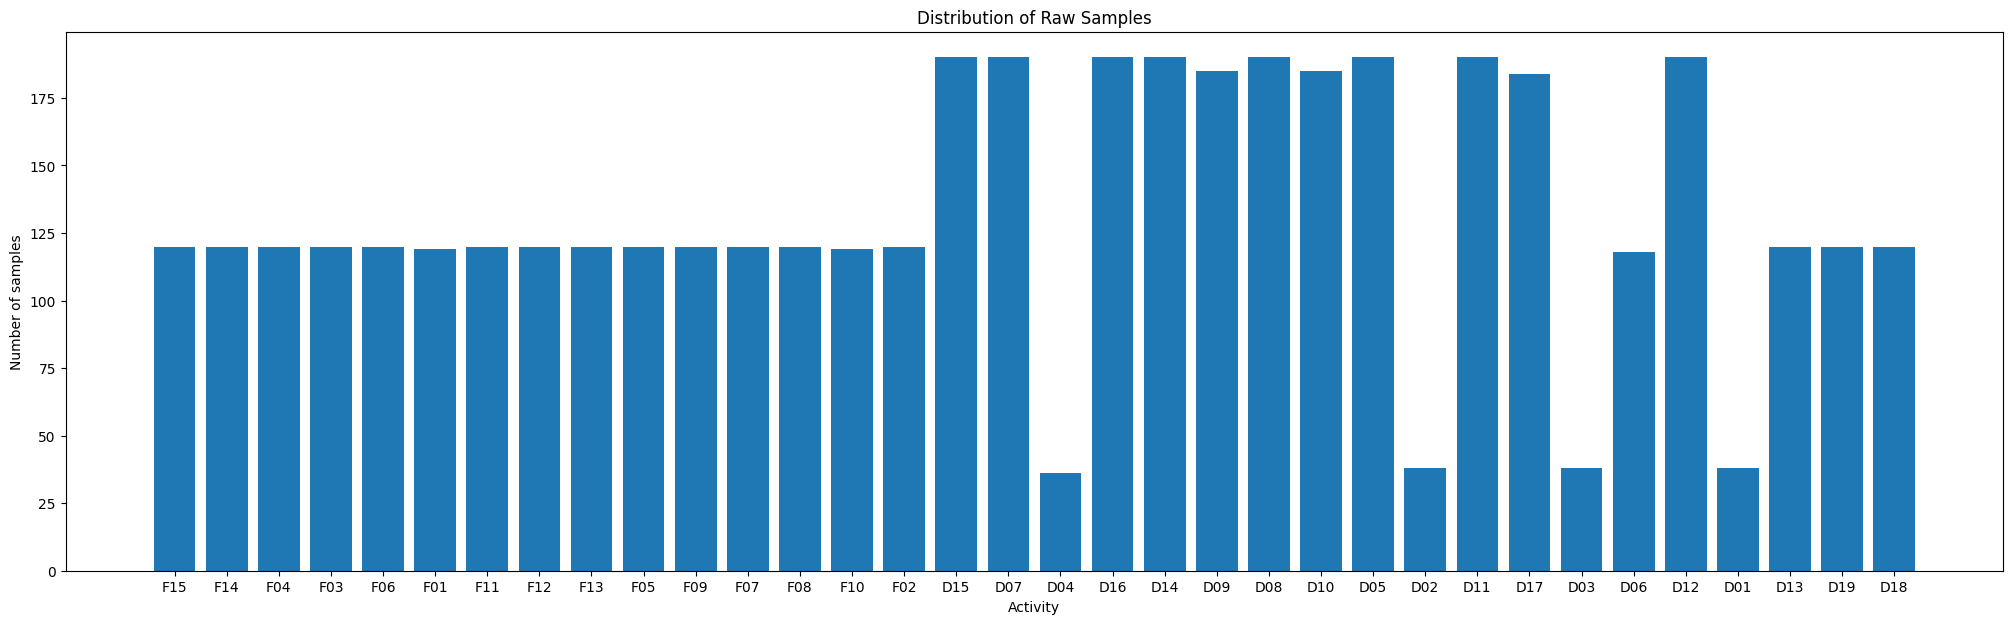

In [ ]:
#Different types of Fall and ADL samples before Window-Sampling and Feature Extraction

fall = os.listdir('/content/gdrive/MyDrive/Preprocessed Data/FALL')
adl = os.listdir('/content/gdrive/MyDrive/Preprocessed Data/NO FALL')

fall = [f[:3] for f in fall]
adl = [f[:3] for f in adl]
total = fall + adl

from collections import Counter

counter = Counter(total)
elements = list(counter.values())
counts = list(counter.keys())

plt.figure(figsize=(25,7))
plt.bar(counts, elements)
plt.xlabel('Activity')
plt.ylabel('Number of samples')
plt.title('Distribution of Raw Samples')

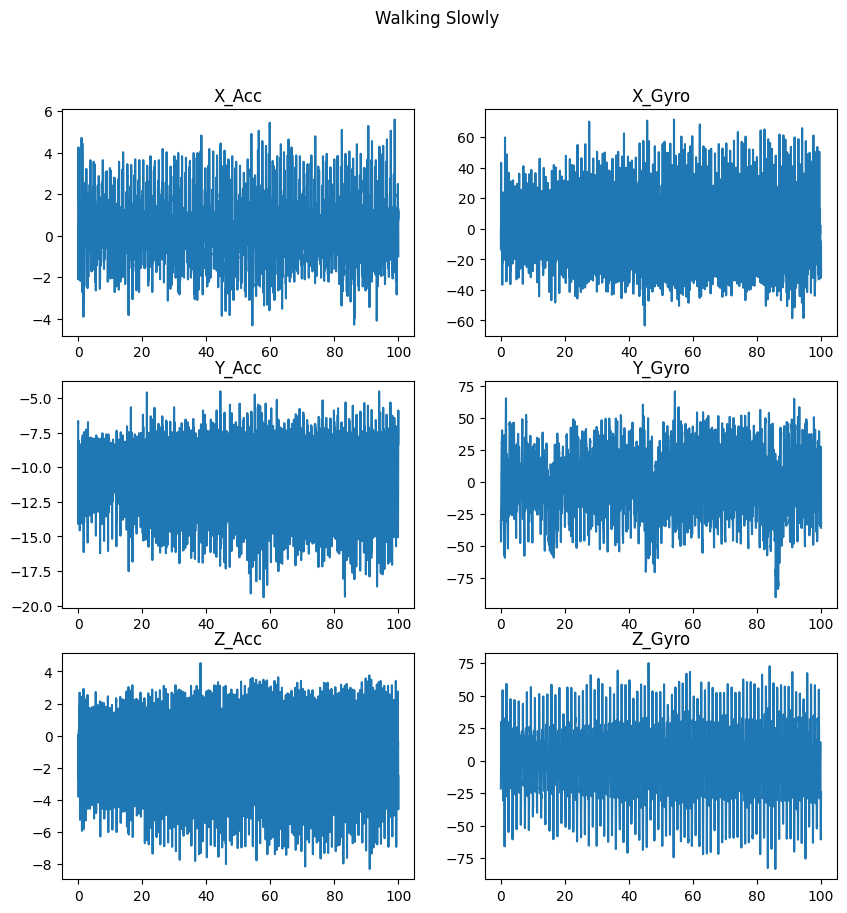

In [ ]:
walk_slow = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D01_SA01_R01.csv')
walk_quick = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D02_SA01_R01.csv')
jog_slow = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D03_SA01_R01.csv')
jog_quick = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D02_SA01_R01.csv')

fig, axs = plt.subplots(3, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Walking Slowly')
axs[0, 0].plot(walk_slow['Timestamp'], walk_slow['X_Acc_1'])
axs[0, 0].set_title('X_Acc')
axs[1, 0].set_title('Y_Acc')
axs[1, 0].plot(walk_slow['Timestamp'], walk_slow['Y_Acc_1'])
axs[2, 0].set_title('Z_Acc')
axs[2, 0].plot(walk_slow['Timestamp'], walk_slow['Z_Acc_1'])
axs[0, 1].plot(walk_slow['Timestamp'], walk_slow['X_Gyro'])
axs[0, 1].set_title('X_Gyro')
axs[1, 1].set_title('Y_Gyro')
axs[1, 1].plot(walk_slow['Timestamp'], walk_slow['Y_Gyro'])
axs[2, 1].set_title('Z_Gyro')
axs[2, 1].plot(walk_slow['Timestamp'], walk_slow['Z_Gyro'])

#It is extremely clear that walking is a continuous activity and thus splitting into 15 second intervals is possible
#Similar observations are valid for jogging and walking quickly

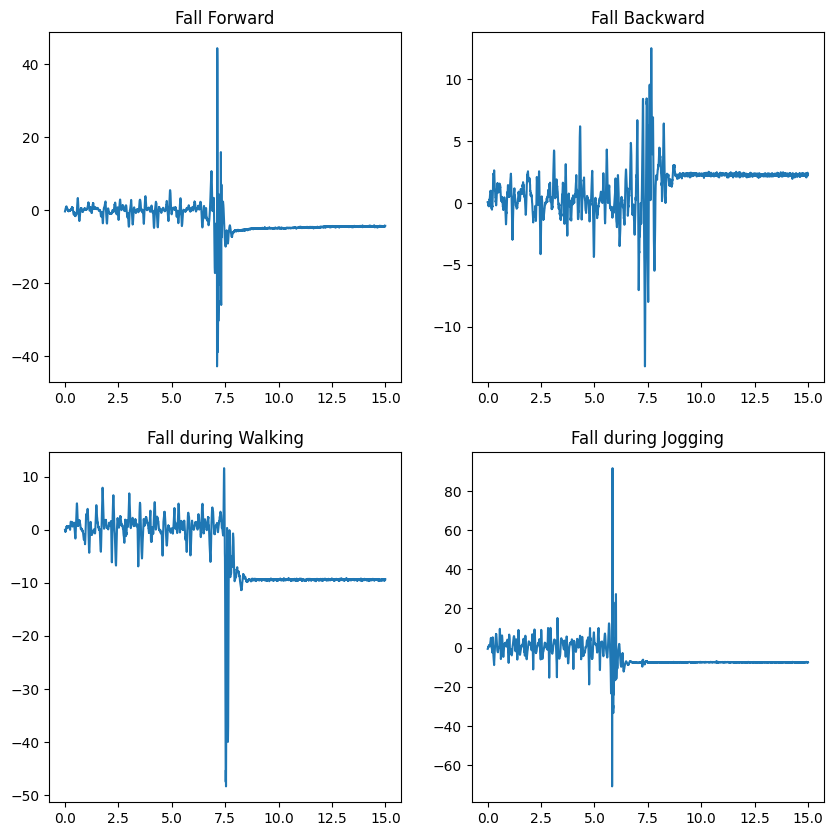

In [ ]:
fall_forward = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/FALL/F01_SA01_R01.csv')
fall_back = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/FALL/F02_SA01_R01.csv')
fall_walk = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/FALL/F04_SA01_R01.csv')
fall_jog = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/FALL/F05_SA01_R01.csv')

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0, 0].set_title('Fall Forward')
axs[0, 0].plot(fall_forward['Timestamp'], fall_forward['X_Acc_1'])
axs[0, 1].set_title('Fall Backward')
axs[0, 1].plot(fall_back['Timestamp'], fall_back['X_Acc_1'])
axs[1, 0].set_title('Fall during Walking')
axs[1, 0].plot(fall_walk['Timestamp'], fall_walk['X_Acc_1'])
axs[1, 1].set_title('Fall during Jogging')
axs[1, 1].plot(fall_jog['Timestamp'], fall_jog['X_Acc_1'])


#We can clearly see that the last few seconds are flat graphs indicating that in case we need to add one more reading we can use forward fill
#Also an important observation is that most falls occur within the first 10 seconds
#Similar trends are seen for other fall categories and different sensor data

Text(0.5, 1.0, 'Activity D11')

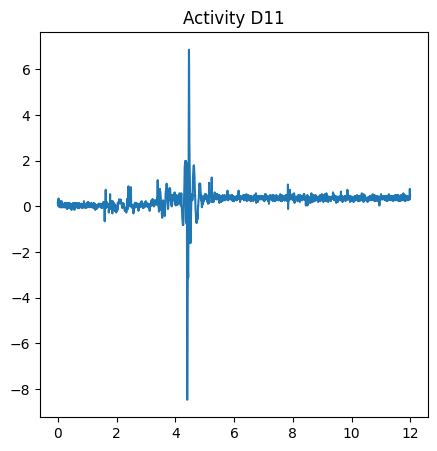

In [ ]:
get_up_collapse = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D11_SA01_R01.csv')

plt.figure(figsize=(5, 5))
plt.plot(get_up_collapse['Timestamp'], get_up_collapse['X_Acc_1'])
plt.title('Activity D11')
#Comparing with Fall graphs above it is clear that D11 is extremely similar to a Fall

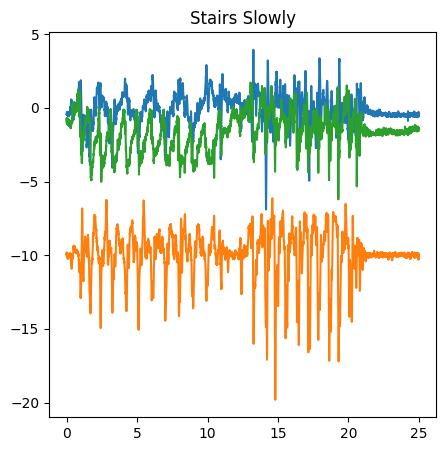

In [ ]:
stairs_slow = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D05_SA01_R01.csv')

plt.figure(figsize=(5, 5))
plt.title('Stairs Slowly')
plt.plot(stairs_slow['Timestamp'], stairs_slow['X_Acc_1'], label ='X_Acc')
plt.plot(stairs_slow['Timestamp'], stairs_slow['Y_Acc_1'], label ='Y_Acc')
plt.plot(stairs_slow['Timestamp'], stairs_slow['Z_Acc_1'], label ='Z_Acc')

#We can clearly see that going up the stairs occurs mostly in the first half and going down the stairs occurs in the lower half
#Thus, splitting it such that the first 15 seconds captures one form of movement while the other 15 seconds captures the other is a valid argument

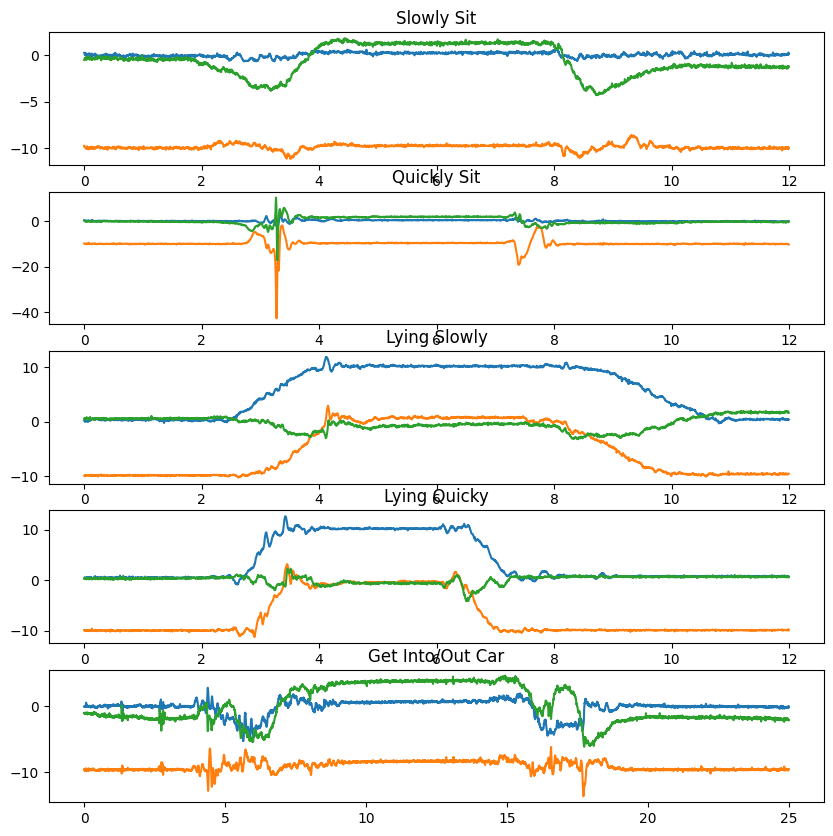

In [ ]:
slowly_sit = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D07_SA01_R01.csv')
quickly_sit = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D08_SA01_R01.csv')
lying_slowly = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D12_SA01_R01.csv')
lying_quickly = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D13_SA01_R01.csv')
get_into_out_car = pd.read_csv('/content/gdrive/MyDrive/Preprocessed Data/NO FALL/D17_SA01_R01.csv')

fig, axs = plt.subplots(5)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0].set_title('Slowly Sit')
axs[0].plot(slowly_sit['Timestamp'], slowly_sit['X_Acc_1'])
axs[0].plot(slowly_sit['Timestamp'], slowly_sit['Y_Acc_1'])
axs[0].plot(slowly_sit['Timestamp'], slowly_sit['Z_Acc_1'])
axs[1].set_title('Quickly Sit')
axs[1].plot(quickly_sit['Timestamp'], quickly_sit['X_Acc_1'])
axs[1].plot(quickly_sit['Timestamp'], quickly_sit['Y_Acc_1'])
axs[1].plot(quickly_sit['Timestamp'], quickly_sit['Z_Acc_1'])
axs[2].set_title('Lying Slowly')
axs[2].plot(lying_slowly['Timestamp'], lying_slowly['X_Acc_1'])
axs[2].plot(lying_slowly['Timestamp'], lying_slowly['Y_Acc_1'])
axs[2].plot(lying_slowly['Timestamp'], lying_slowly['Z_Acc_1'])
axs[3].set_title('Lying Quicky')
axs[3].plot(lying_quickly['Timestamp'], lying_quickly['X_Acc_1'])
axs[3].plot(lying_quickly['Timestamp'], lying_quickly['Y_Acc_1'])
axs[3].plot(lying_quickly['Timestamp'], lying_quickly['Z_Acc_1'])
axs[4].set_title('Get Into/Out Car')
axs[4].plot(get_into_out_car['Timestamp'], get_into_out_car['X_Acc_1'])
axs[4].plot(get_into_out_car['Timestamp'], get_into_out_car['Y_Acc_1'])
axs[4].plot(get_into_out_car['Timestamp'], get_into_out_car['Z_Acc_1'])

#The flattening at the end of all activities suggest that there is no activity occurring and is just irrelevant data
#Thus we can effectively conclude that we can increase the length using forward fill
#Same is true for Gyro readings and other D7-D19 data not represented below

In [ ]:
#Mounting google drive to access the dataset
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
os.chdir('/content/gdrive/MyDrive/APS360 Project')

In [ ]:
import torch
import numpy as np

In [ ]:
final_data_2  = np.load('CNN-LSTM Data.npy')
labels = np.load('CNN-LSTM Labels.npy')

In [ ]:
final_data = torch.from_numpy(final_data_2)

In [ ]:
final_data[0].shape
x = [i for i in range(0,14)]
y = final_data[0,:,0]
z = final_data[0,:,1]
a = final_data[0,:,2]


In [ ]:
data = pd.read_csv('SVM Data.csv')

In [ ]:
col = data.columns[2:-2]

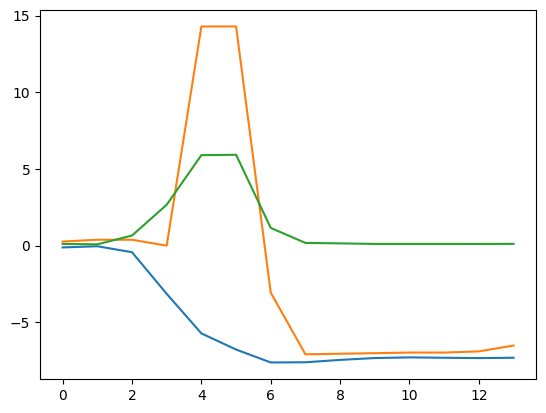

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,a)
plt.show()

In [ ]:
count = 0
state = []
for elem in data["Label"]:
  if elem == 1:
    state.append("Fall")
  else:
    state.append("No Fall")
  count += 1

In [ ]:
data["State"] = state

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot

rows = 2500
start = 500

col_start = 2
df = pd.DataFrame(data.iloc[start:start+rows,col_start:col_start+3])

df["State"] = data.iloc[start:start+rows,-1]
#col = pd.DataFrame(df_train.iloc[0:2,562])
sns.pairplot(df, hue = "State")

TypeError: pairplot() got an unexpected keyword argument 'alpha'

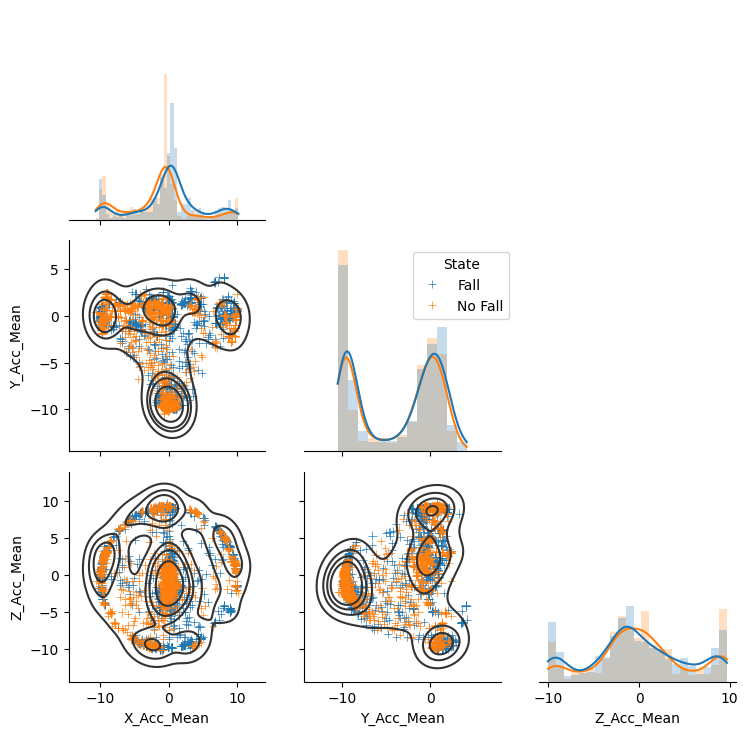

In [ ]:
rows = 2500
start = 500

col_start = 2
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

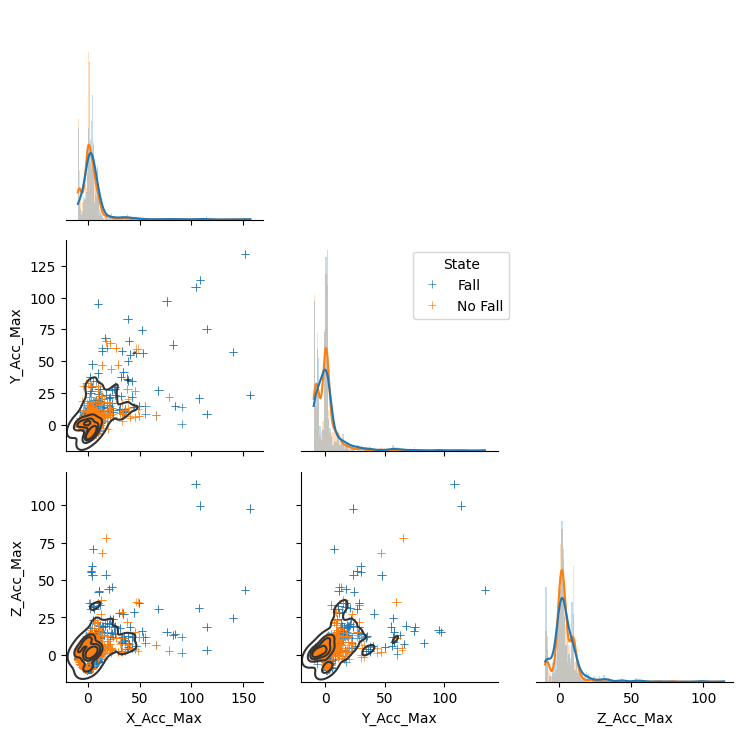

In [ ]:
col_start = 1
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

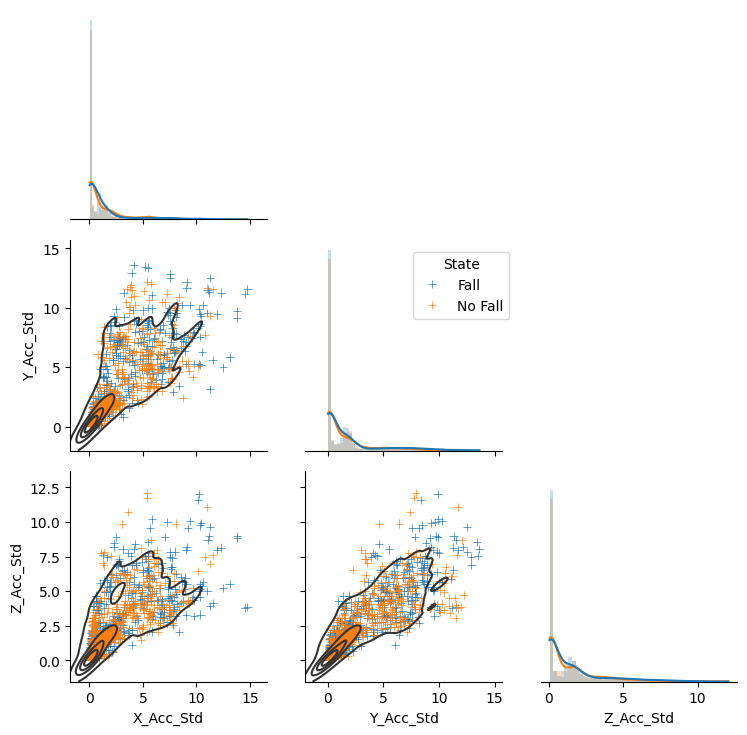

In [ ]:
col_start = 2
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

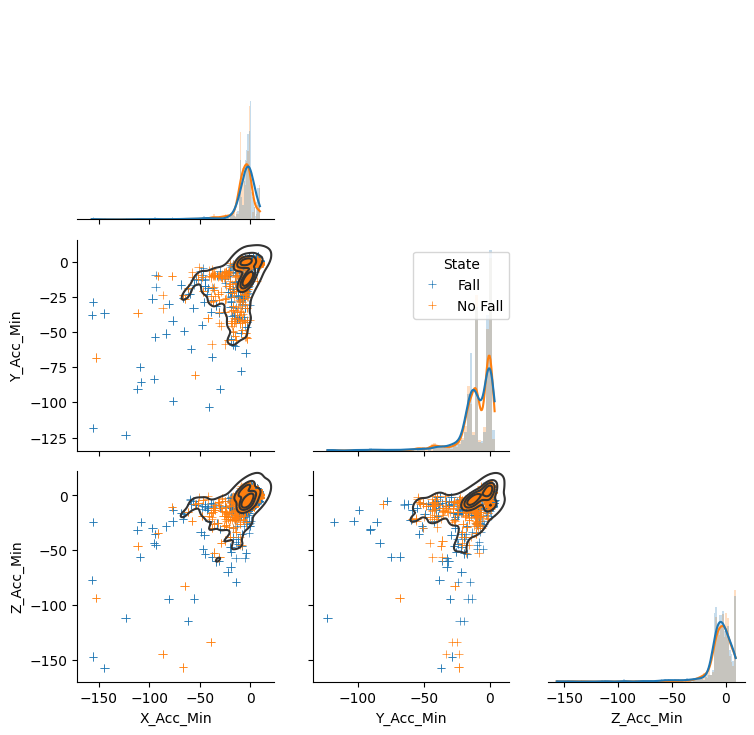

In [ ]:
col_start = 3
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

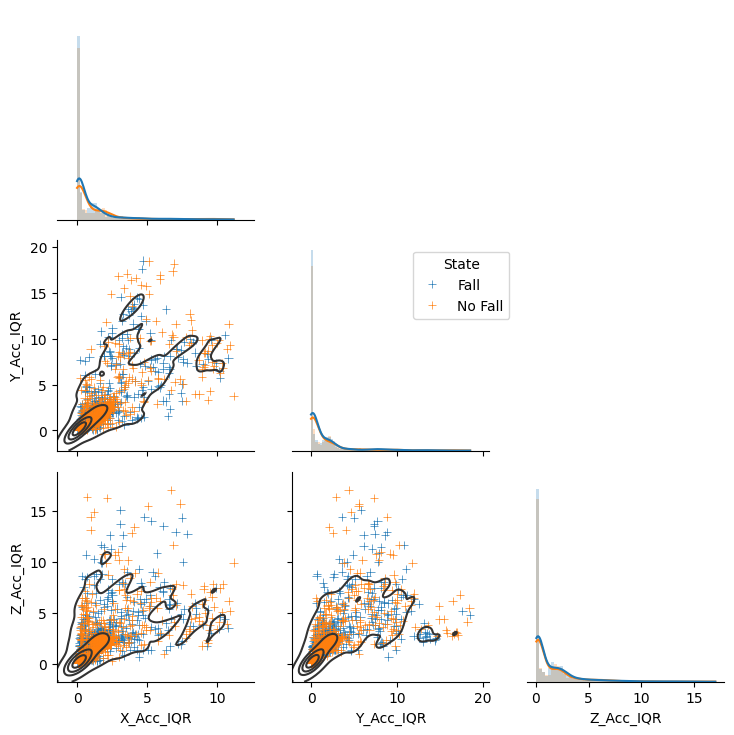

In [ ]:
col_start = 4
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

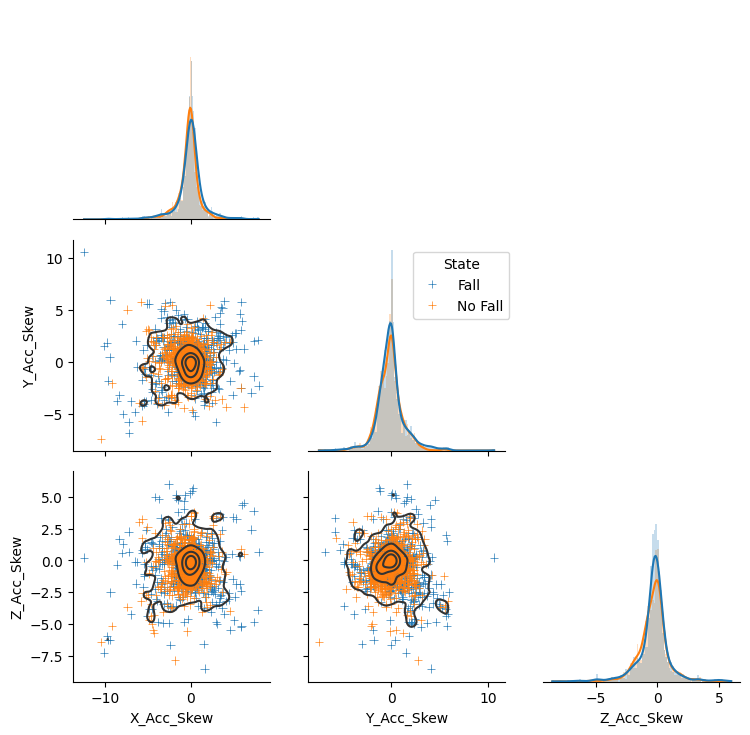

In [ ]:
col_start = 5
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

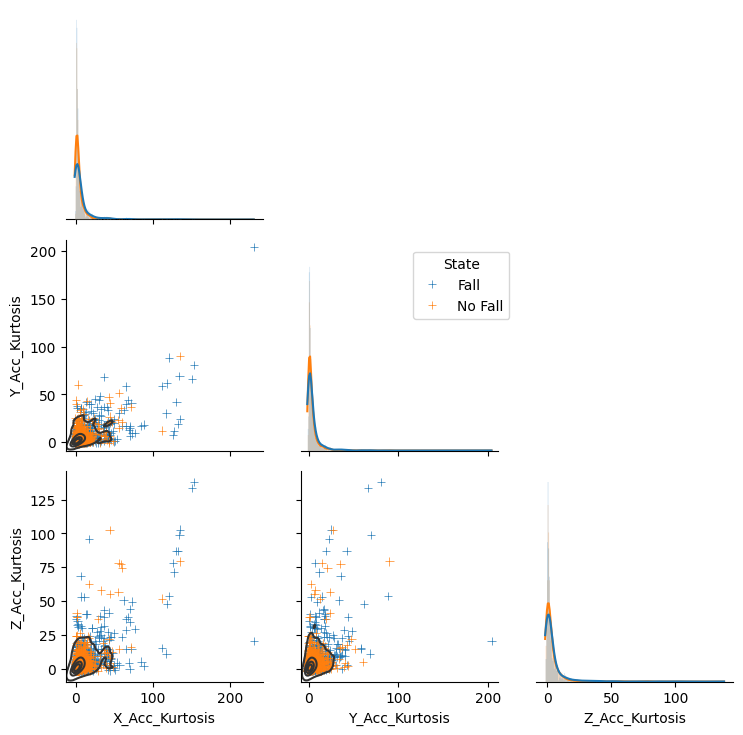

In [ ]:
col_start = 6
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

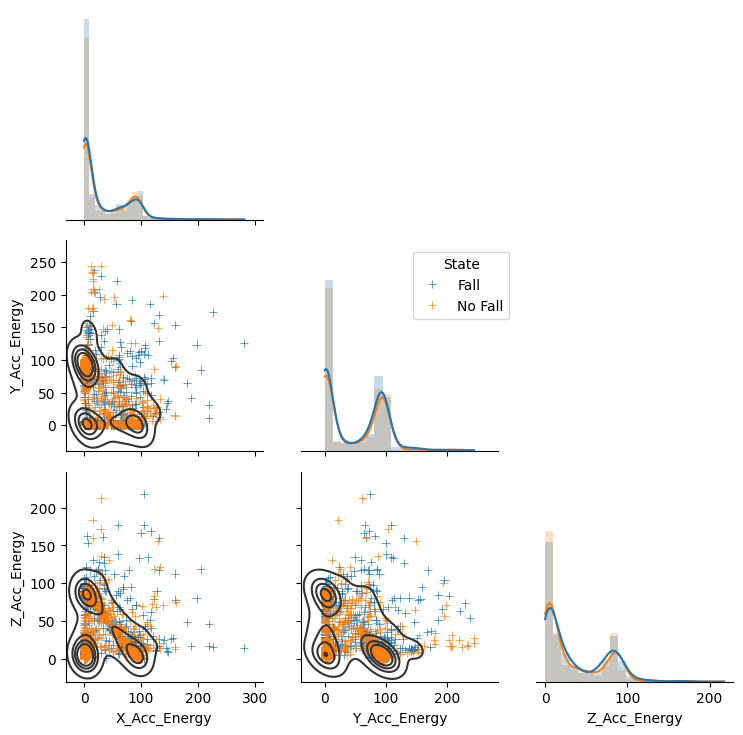

In [ ]:
col_start = 7
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

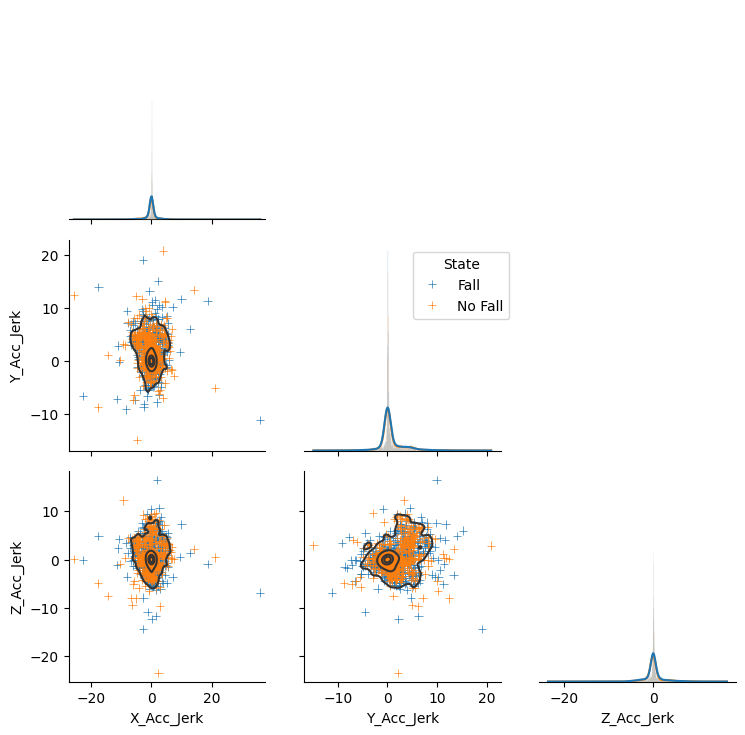

In [ ]:
col_start = 8
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

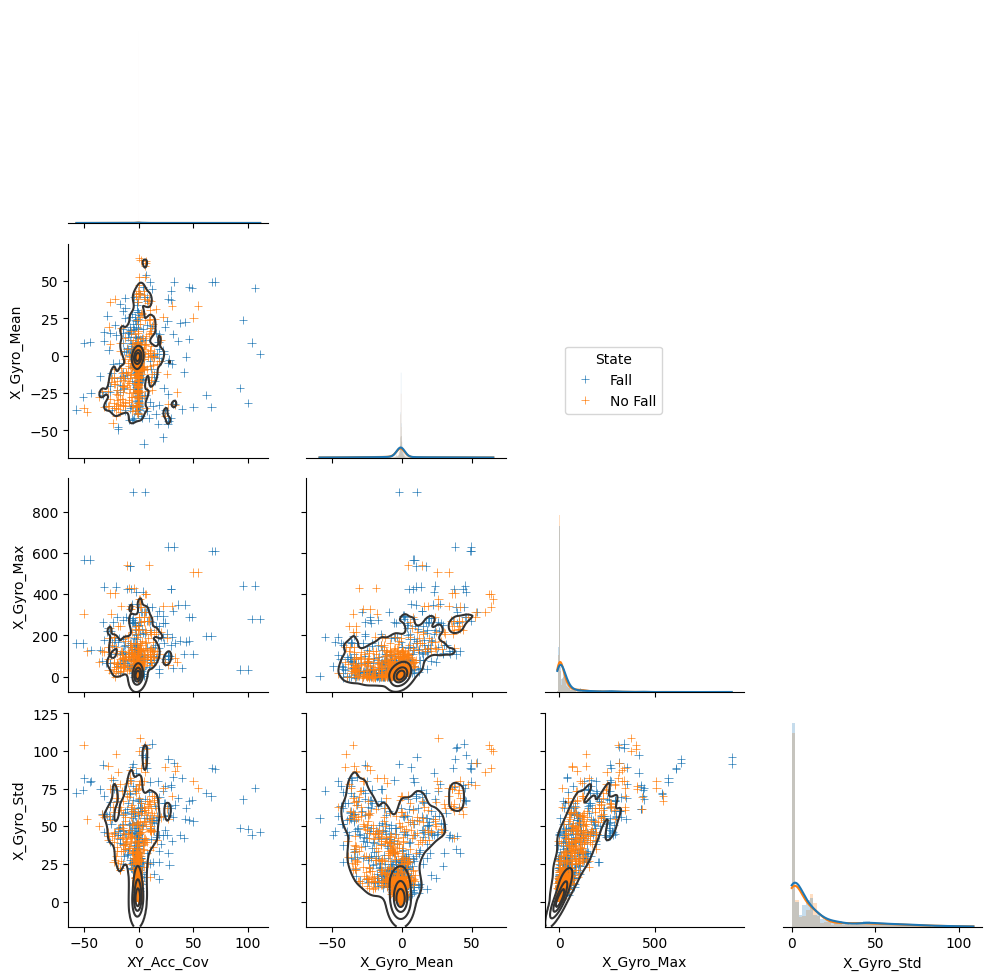

In [ ]:
col_start = 9
df = pd.DataFrame(data.iloc[start:start+rows,[2t]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

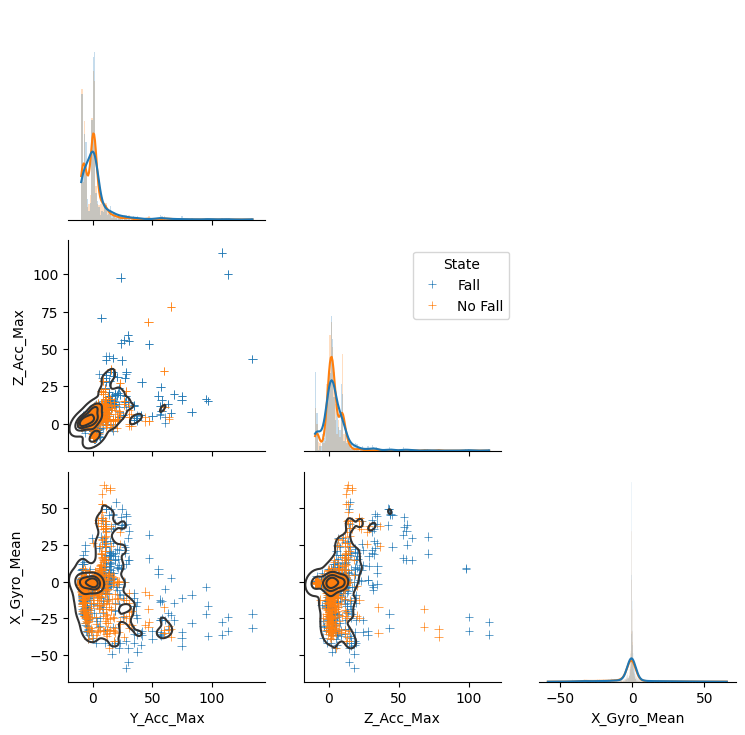

In [ ]:
col_start = 10
df = pd.DataFrame(data.iloc[start:start+rows,[2 + col_start,11 + col_start,20+col_start]])

df["State"] = data.iloc[start:start+rows,-1]

g = sns.PairGrid(df, hue="State", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

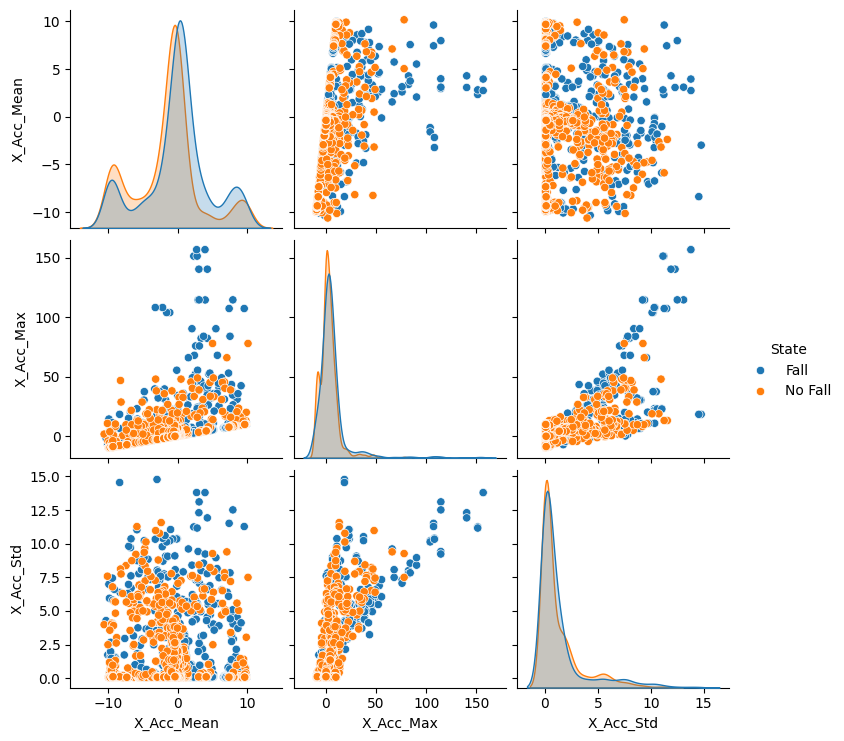

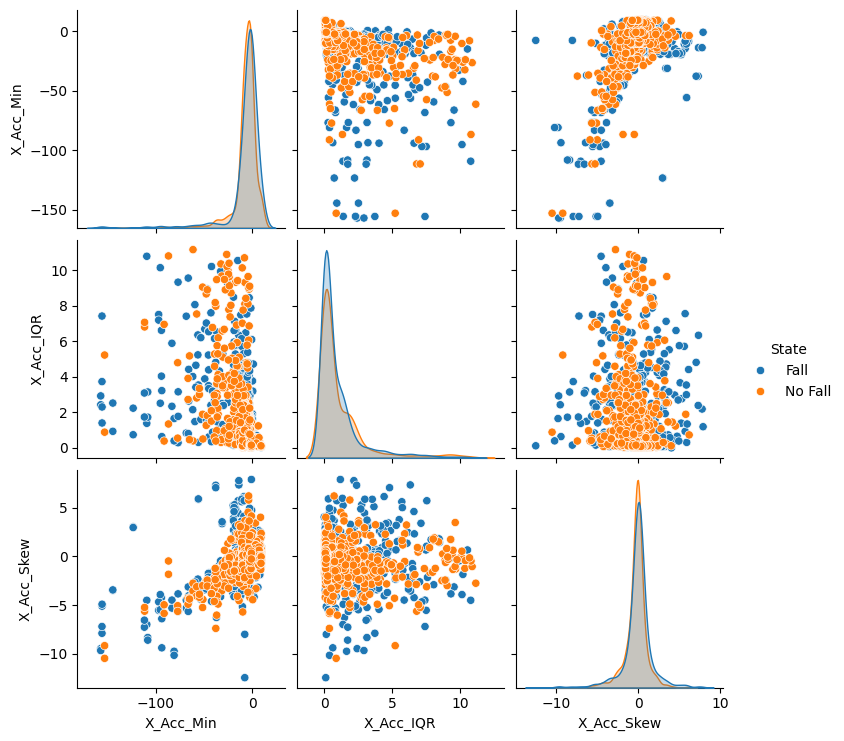

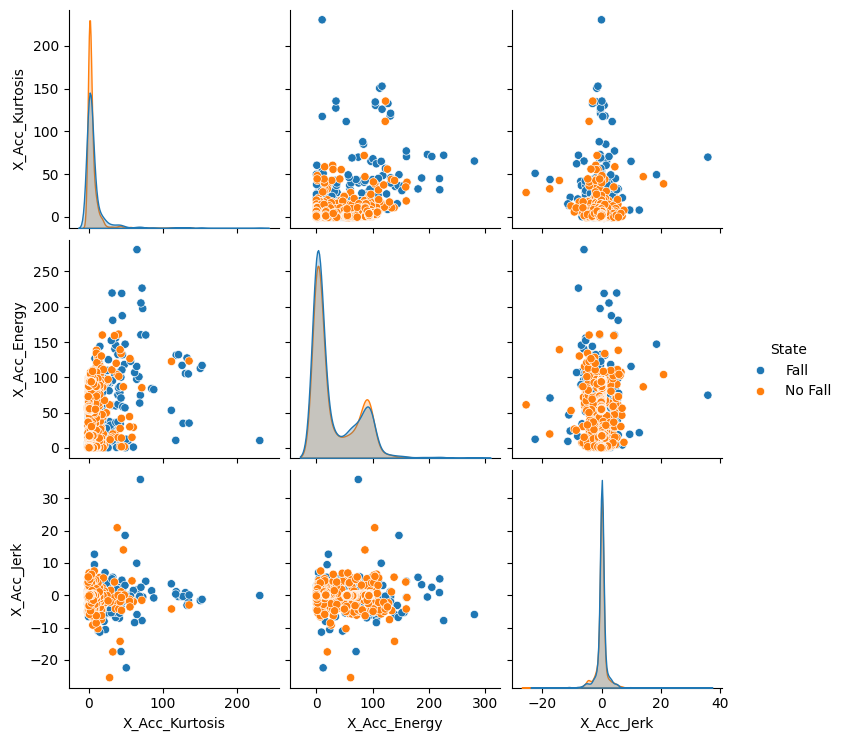

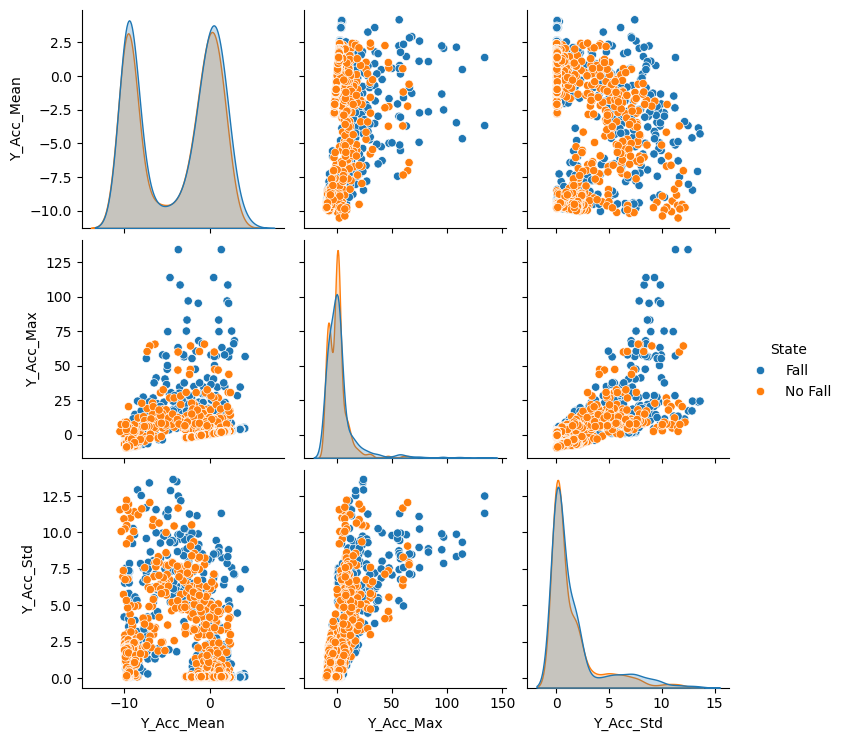

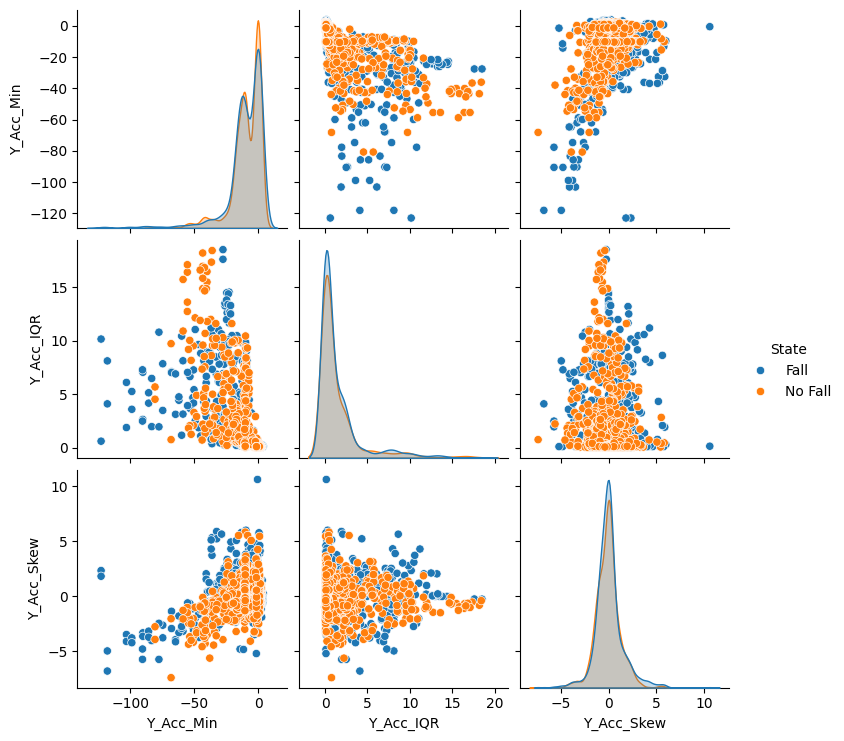

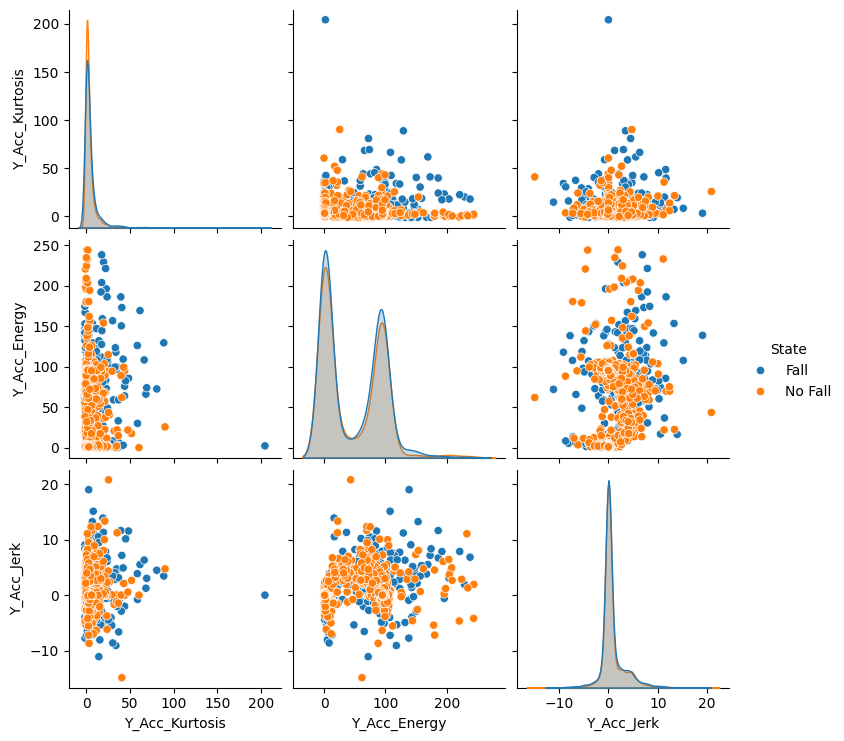

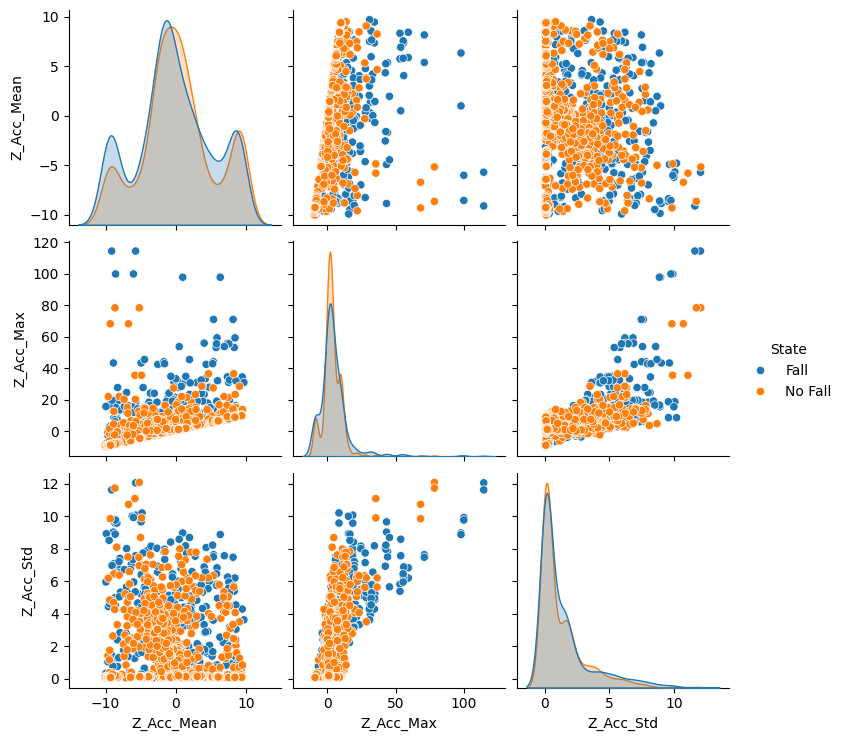

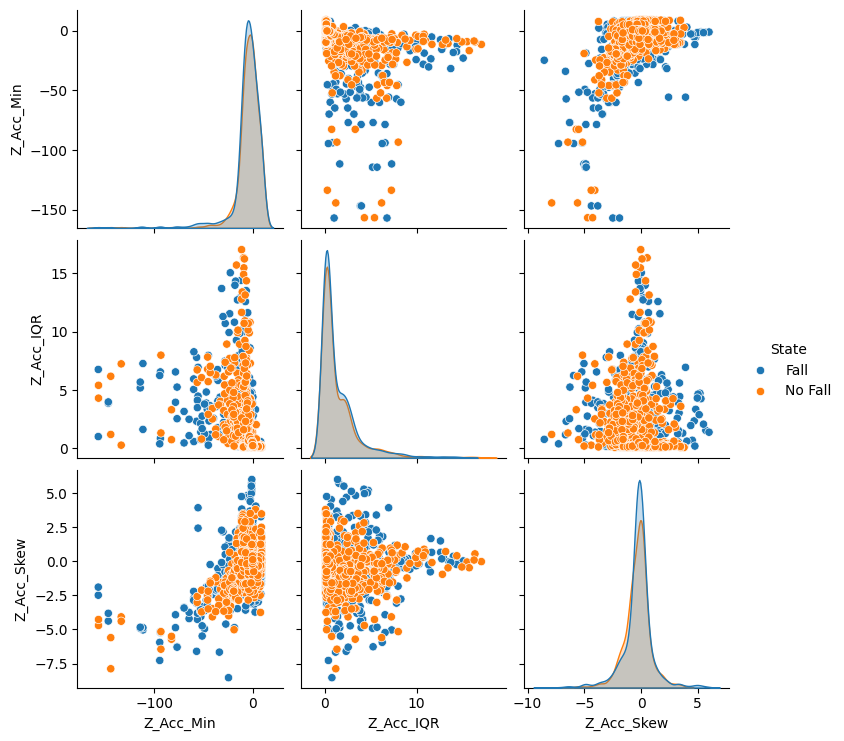

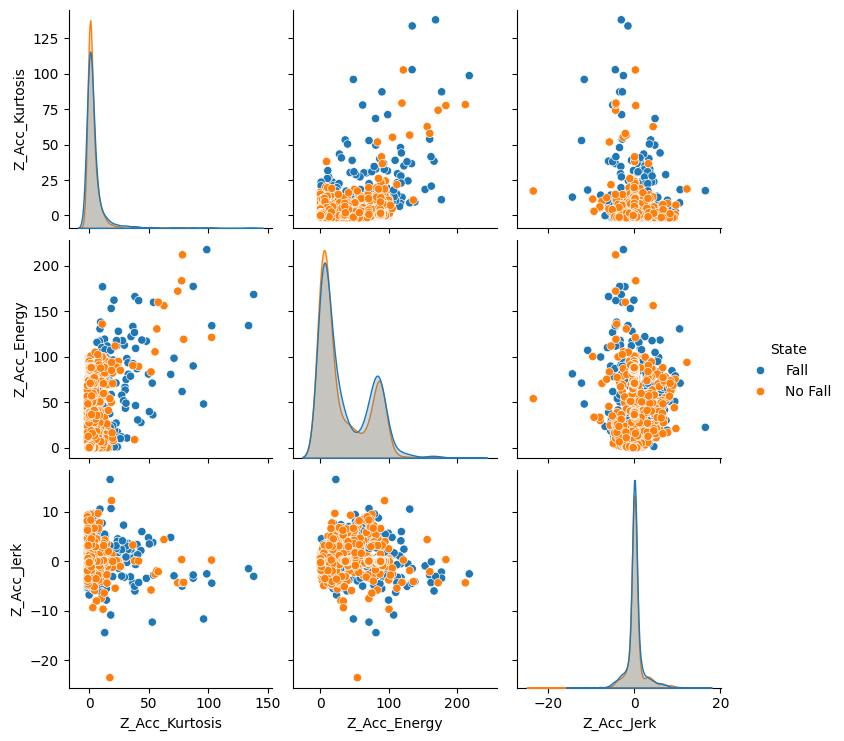

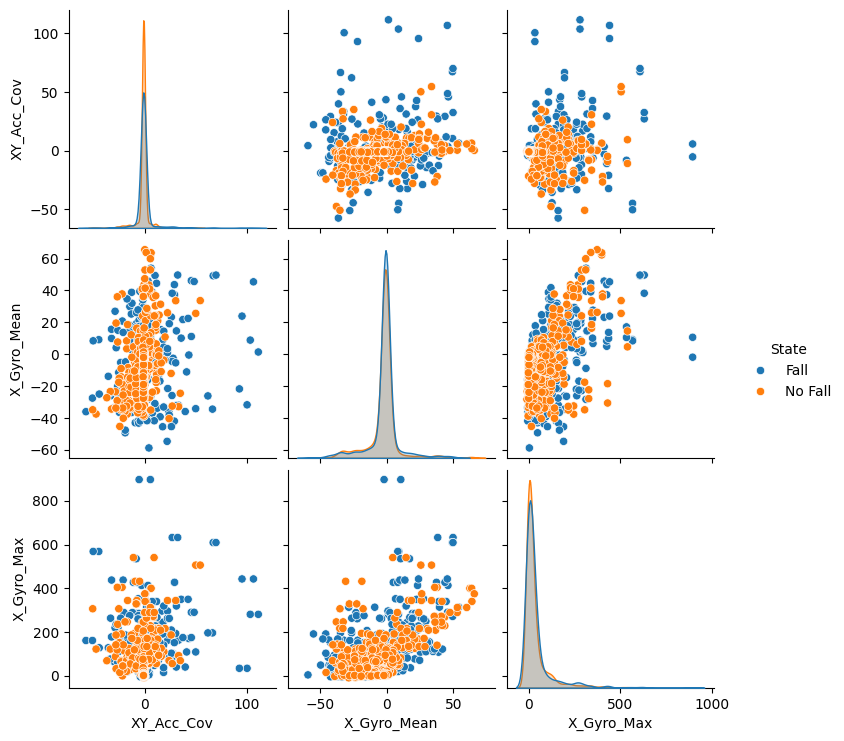

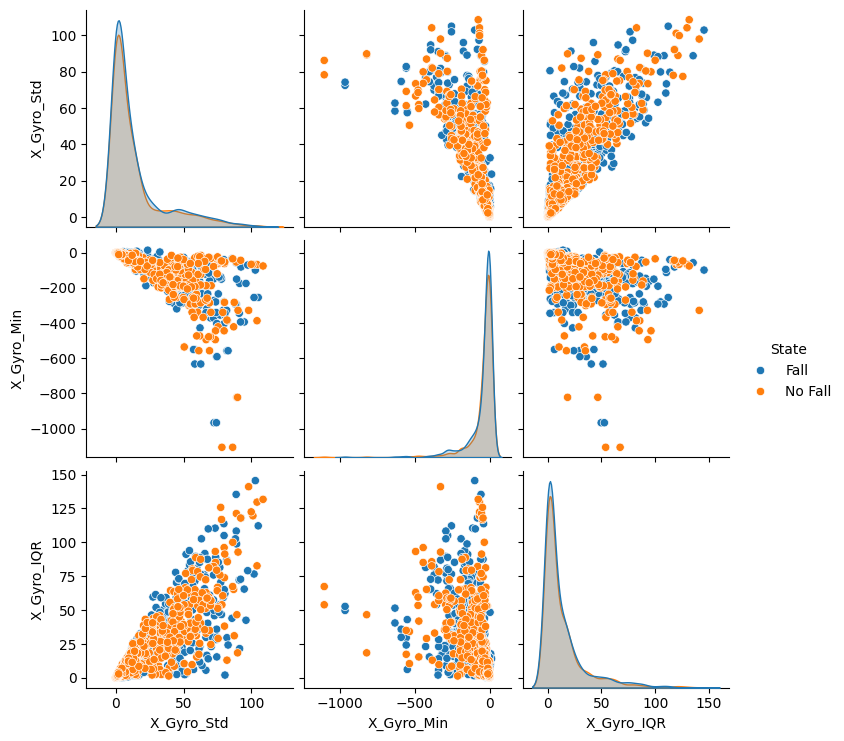

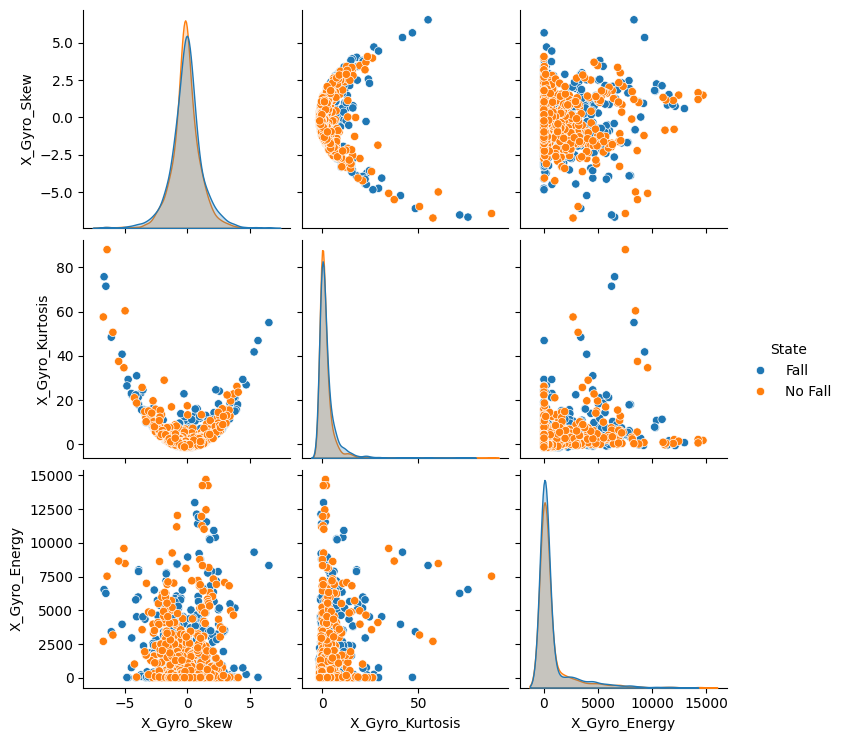

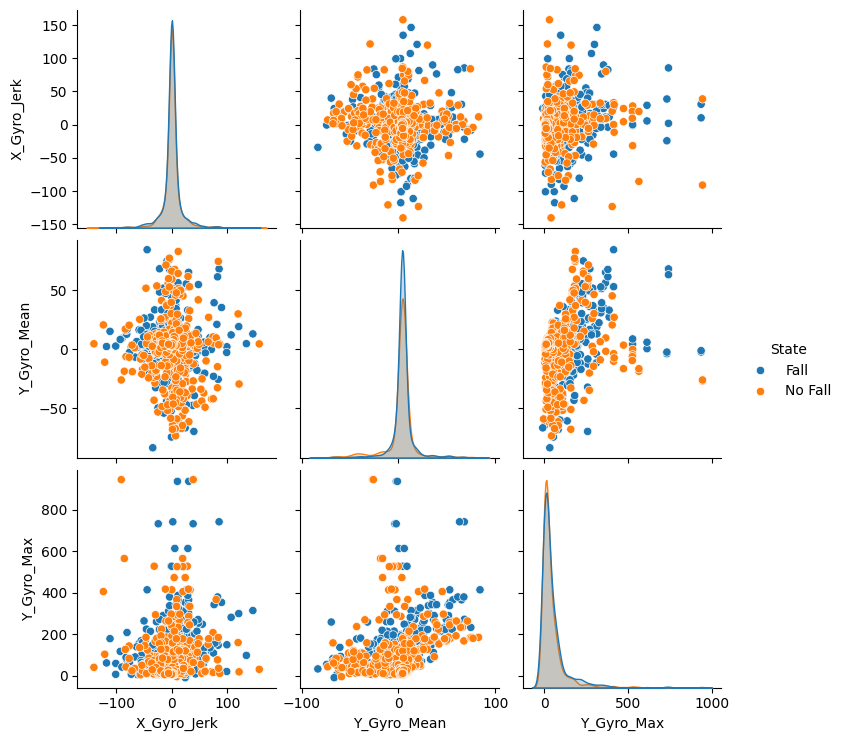

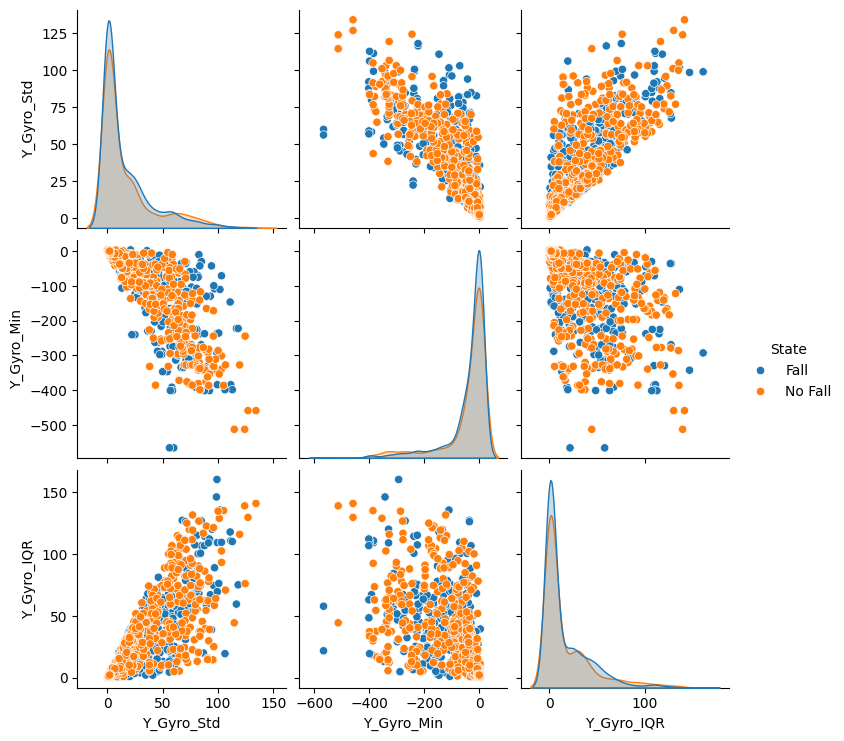

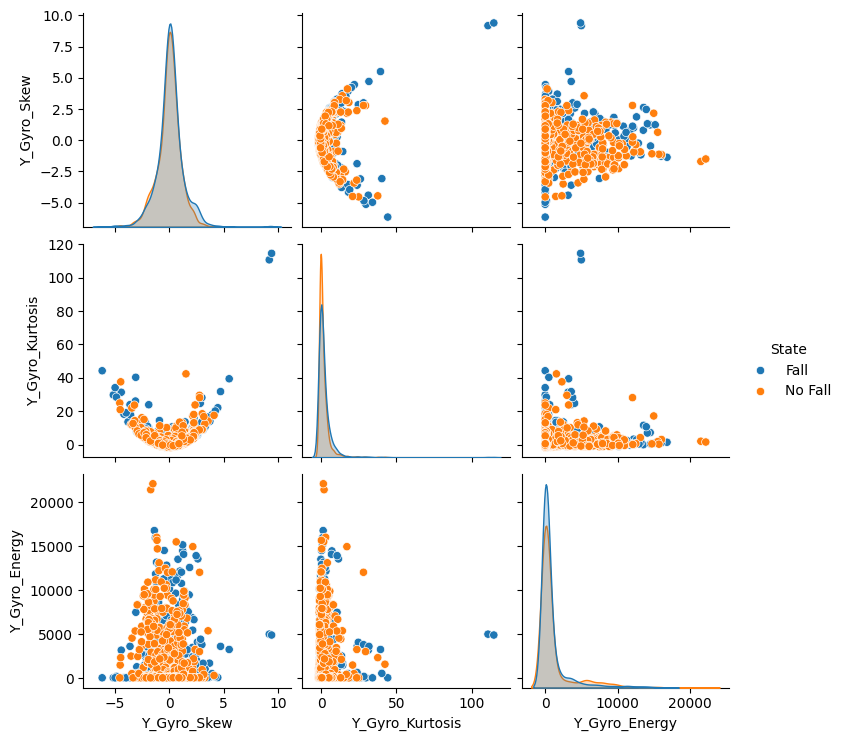

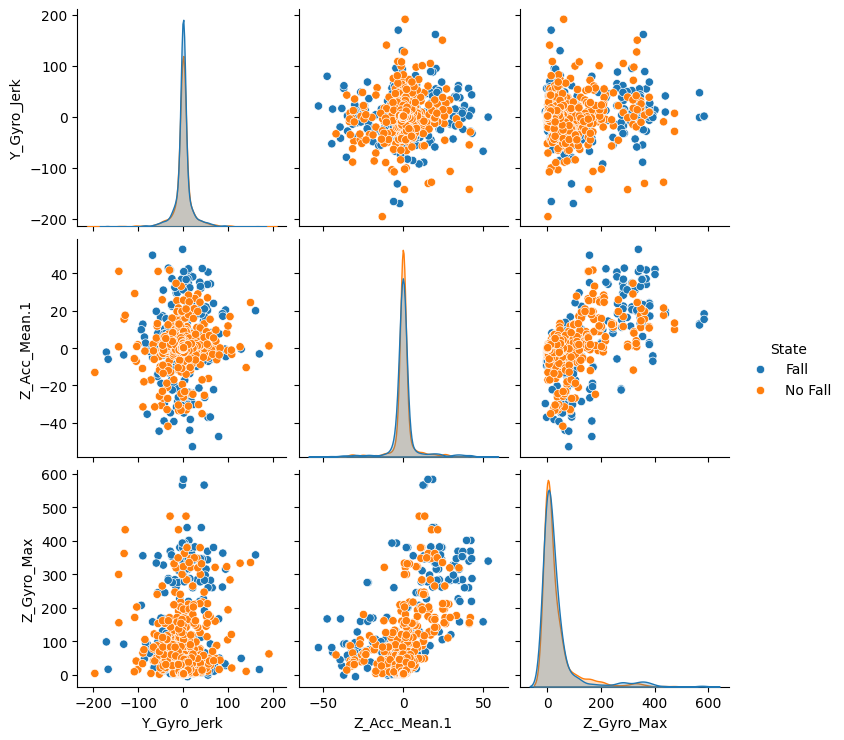

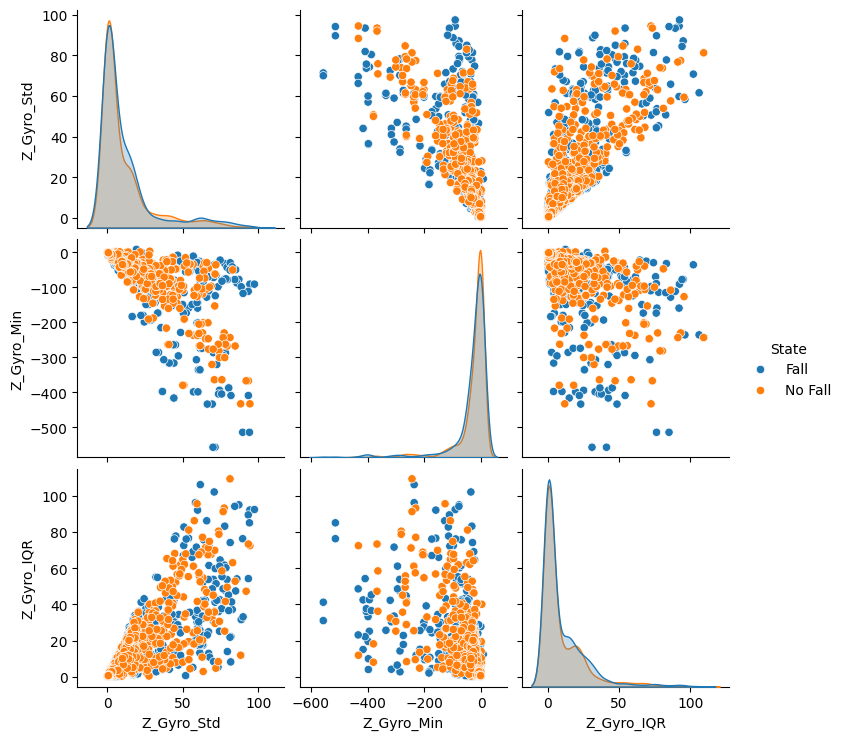

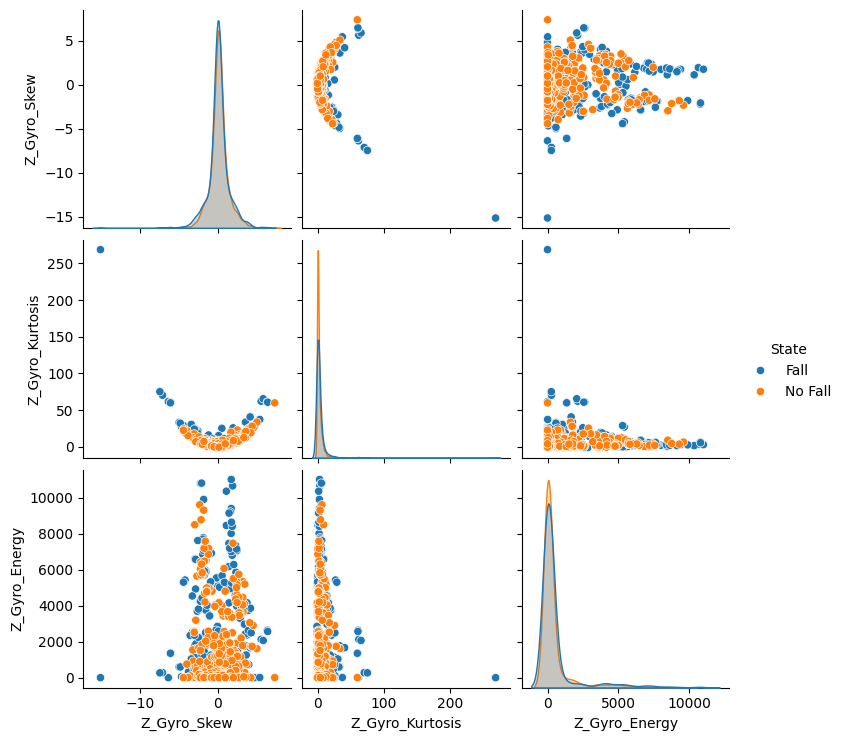

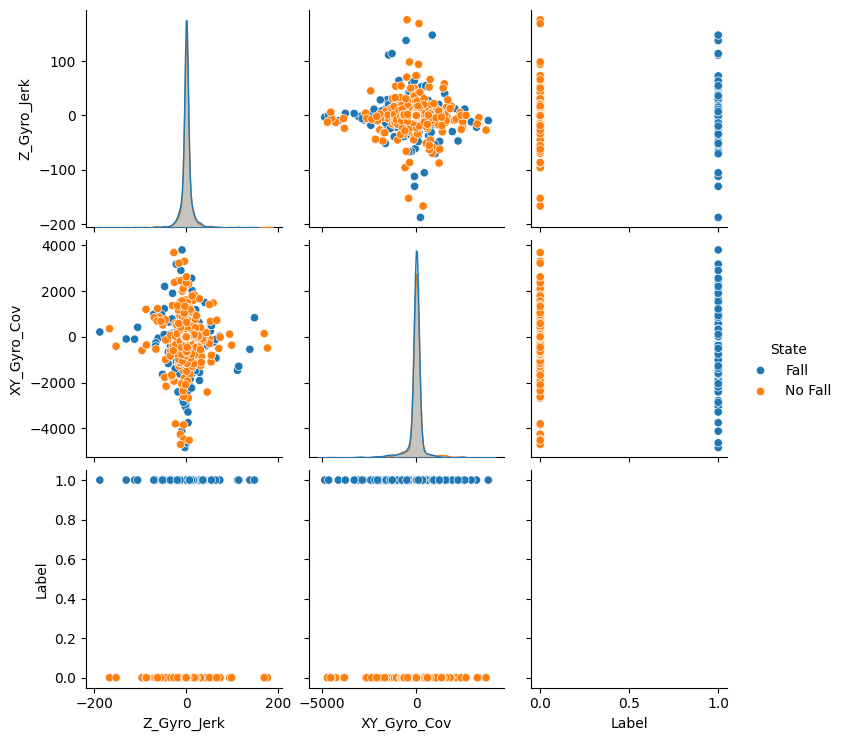

In [ ]:

for col_start in range(2,len(data.columns)-3,3):
  df = pd.DataFrame(data.iloc[start:start+rows,col_start:col_start+3])


  df["State"] = data.iloc[start:start+rows,-1]
  #col = pd.DataFrame(df_train.iloc[0:2,562])
  s = sns.pairplot(df, hue = "State")
  fig = s.fig
  fig.savefig(f'plot{col_start}.png')

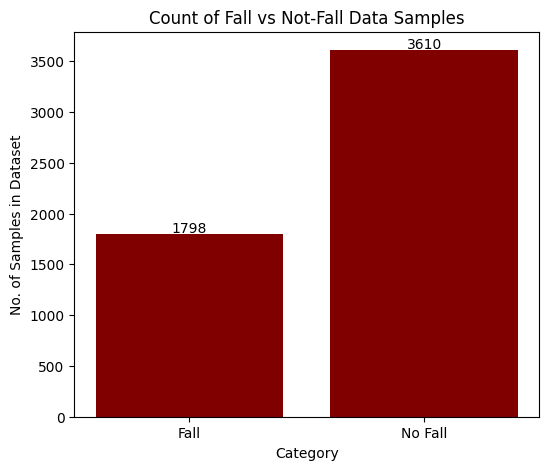

In [ ]:
def addLabels(x,y):
    for i in range(len(x)):
        plt.text(i, int(y[i]) + 20,str(int( y[i]) ), ha = 'center')

# creating the dataset
courses = ["Fall", "No Fall"]

total_fall = sum(labels)
total = len(labels)
values = [total_fall, total - total_fall]

fig = plt.figure(figsize = (6, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon')
addLabels(courses, values)
plt.xlabel("Category")
plt.ylabel("No. of Samples in Dataset")
plt.title("Count of Fall vs Not-Fall Data Samples")
plt.show()

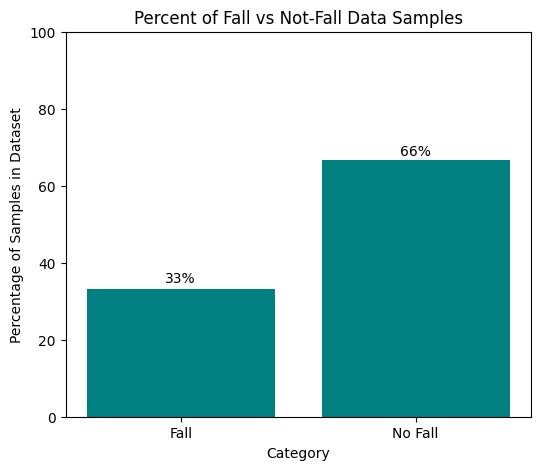

In [ ]:

def addPercentLabels(x,y):
    for i in range(len(x)):
        plt.text(i, int(y[i]) + 2,str(int( y[i]) )+ "%", ha = 'center')
values = [total_fall / total * 100, (total - total_fall)/total* 100]


fig = plt.figure(figsize = (6, 5))

# creating the bar plot
plt.bar(courses, values, color ='teal')
plt.xlabel("Category")
plt.ylabel("Percentage of Samples in Dataset")
plt.title("Percent of Fall vs Not-Fall Data Samples")
# function to add value labels
addPercentLabels(courses, values)
plt.ylim(0,100)
plt.show()

NameError: name 'df_train' is not defined

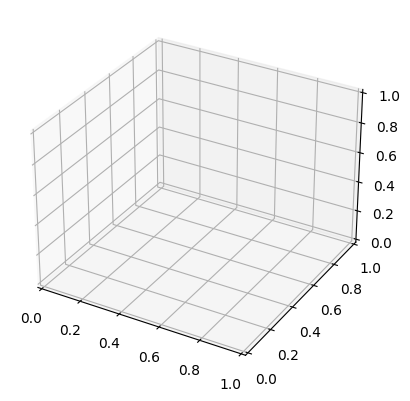

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = df_train.iloc[0:50,0]
y1 = df_train.iloc[0:50,1]
z1 = df_train.iloc[0:50,2]

#x2 = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
#y2 = np.random.randint(-10, 0, size=10)
#z2 = np.random.randint(10, size=10)

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
#ax.scatter(x2, y2, z2, c='g', marker='D', label='green')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()